<a href=https://colab.research.google.com/github/amchecker/amcheck/blob/main/tutorial/amcheck_tutorial.ipynb target="_parent"><img src=https://colab.research.google.com/assets/colab-badge.svg alt="Open In Colab"/></a>

This tutorial describes the installation and usage of the `amcheck` package
that allows one to check whether the given crystal structure with a given magnetic pattern is an altermanget.
You will learn how to use a command-line tool to analyze a magnetic material of interest.


The underlying code is available in the Github [repository](https://github.com/amchecker/amcheck) and the theory behind it is described in the
Ref. [1].

# Installation

`amcheck` can be installed using the `pip` command:

In [ ]:
pip install amcheck

To check that the installation was successful and the `amcheck` package is available, run the following command to see the description of the `amcheck` command-line tool parameters.

In [ ]:
!amcheck --help

#Examples

In following the usage of the tool is showcased using a few examples.

##MnF2

We will get familiar with the `amcheck` command-line interface tool by analyzing MnF$_2$ compound: it has rutile structure, space group #136, with two magnetic Mn ions and four non-magnetic F ions [2].

The structure file for this example is `MnF2.cif`.
For more details on Crystallographic Information File (CIF) check Ref. [3].


Here we will create the `MnF2.cif` file using the following command:

In [ ]:
%%shell
cat << EOF > MnF.cif

#======================================================================
# CRYSTAL DATA
#----------------------------------------------------------------------
data_VESTA_phase_1

_chemical_name_common                  'MnF2'
_cell_length_a                         4.873600
_cell_length_b                         4.873600
_cell_length_c                         3.310200
_cell_angle_alpha                      90.000000
_cell_angle_beta                       90.000000
_cell_angle_gamma                      90.000000
_cell_volume                           78.623794
_space_group_name_H-M_alt              'P 42/m n m'
_space_group_IT_number                 136

loop_
_space_group_symop_operation_xyz
   'x, y, z'
   '-x, -y, -z'
   '-x, -y, z'
   'x, y, -z'
   '-y+1/2, x+1/2, z+1/2'
   'y+1/2, -x+1/2, -z+1/2'
   'y+1/2, -x+1/2, z+1/2'
   '-y+1/2, x+1/2, -z+1/2'
   '-x+1/2, y+1/2, -z+1/2'
   'x+1/2, -y+1/2, z+1/2'
   'x+1/2, -y+1/2, -z+1/2'
   '-x+1/2, y+1/2, z+1/2'
   'y, x, -z'
   '-y, -x, z'
   '-y, -x, -z'
   'y, x, z'

loop_
   _atom_site_label
   _atom_site_occupancy
   _atom_site_fract_x
   _atom_site_fract_y
   _atom_site_fract_z
   _atom_site_adp_type
   _atom_site_U_iso_or_equiv
   _atom_site_type_symbol
   Mn         1.0     0.000000     0.000000     0.000000    Uiso  0.050000 Mn
   F          1.0     0.304910     0.304910     0.000000    Uiso  0.050000 F

EOF

We want to note that although the unit cell contains 2 Mn ions and 4 F ions, the file contains only two designations:
```
   Mn         1.0     0.000000     0.000000     0.000000    Uiso  0.050000 Mn
   F          1.0     0.304910     0.304910     0.000000    Uiso  0.050000 F
```
The reason is that it is enough to specify the positions of one of each ions and the rest can be reconstructed using the information on underlying symmetries: in the `MnF2.cif` file this information is stored after the `_space_group_symop_operation_xyz` keyword.

To run the `amcheck` tool one simply invokes the following command:
```
!amcheck MnF.cif
```
and after printing the following information, the tool waits for the input from the user:
```
================================================================================
Processing: MnF2.cif
--------------------------------------------------------------------------------
Spacegroup: P4_2/mnm (136)

Writing the used structure to auxiliary file: check MnF2.cif_amcheck.vasp.

Orbit of Mn atoms at positions:
1 (1) [0. 0. 0.]}
2 (2) [0.5 0.5 0.5]}
Type spin (u, U, d, D, n, N, nn or NN) for each of them (space separated):
```

At first it lists what file is being processed, `MnF2.cif`, followed by the determined space group of non-magnetic crystal, `P4_2/mnm (136)`.

To have a visual aid, useful when analyzing more complicated structures, the tool creates an auxiliary file, in this case named the `MnF2.cif_amcheck.vasp` file, which contains the list of atoms in the `POSCAR` format [4]
ordered in the same way as they appear in the output.
When working on a local machine, one can open this file with a crystal visualization software, like VESTA.
See the reference visualization below:

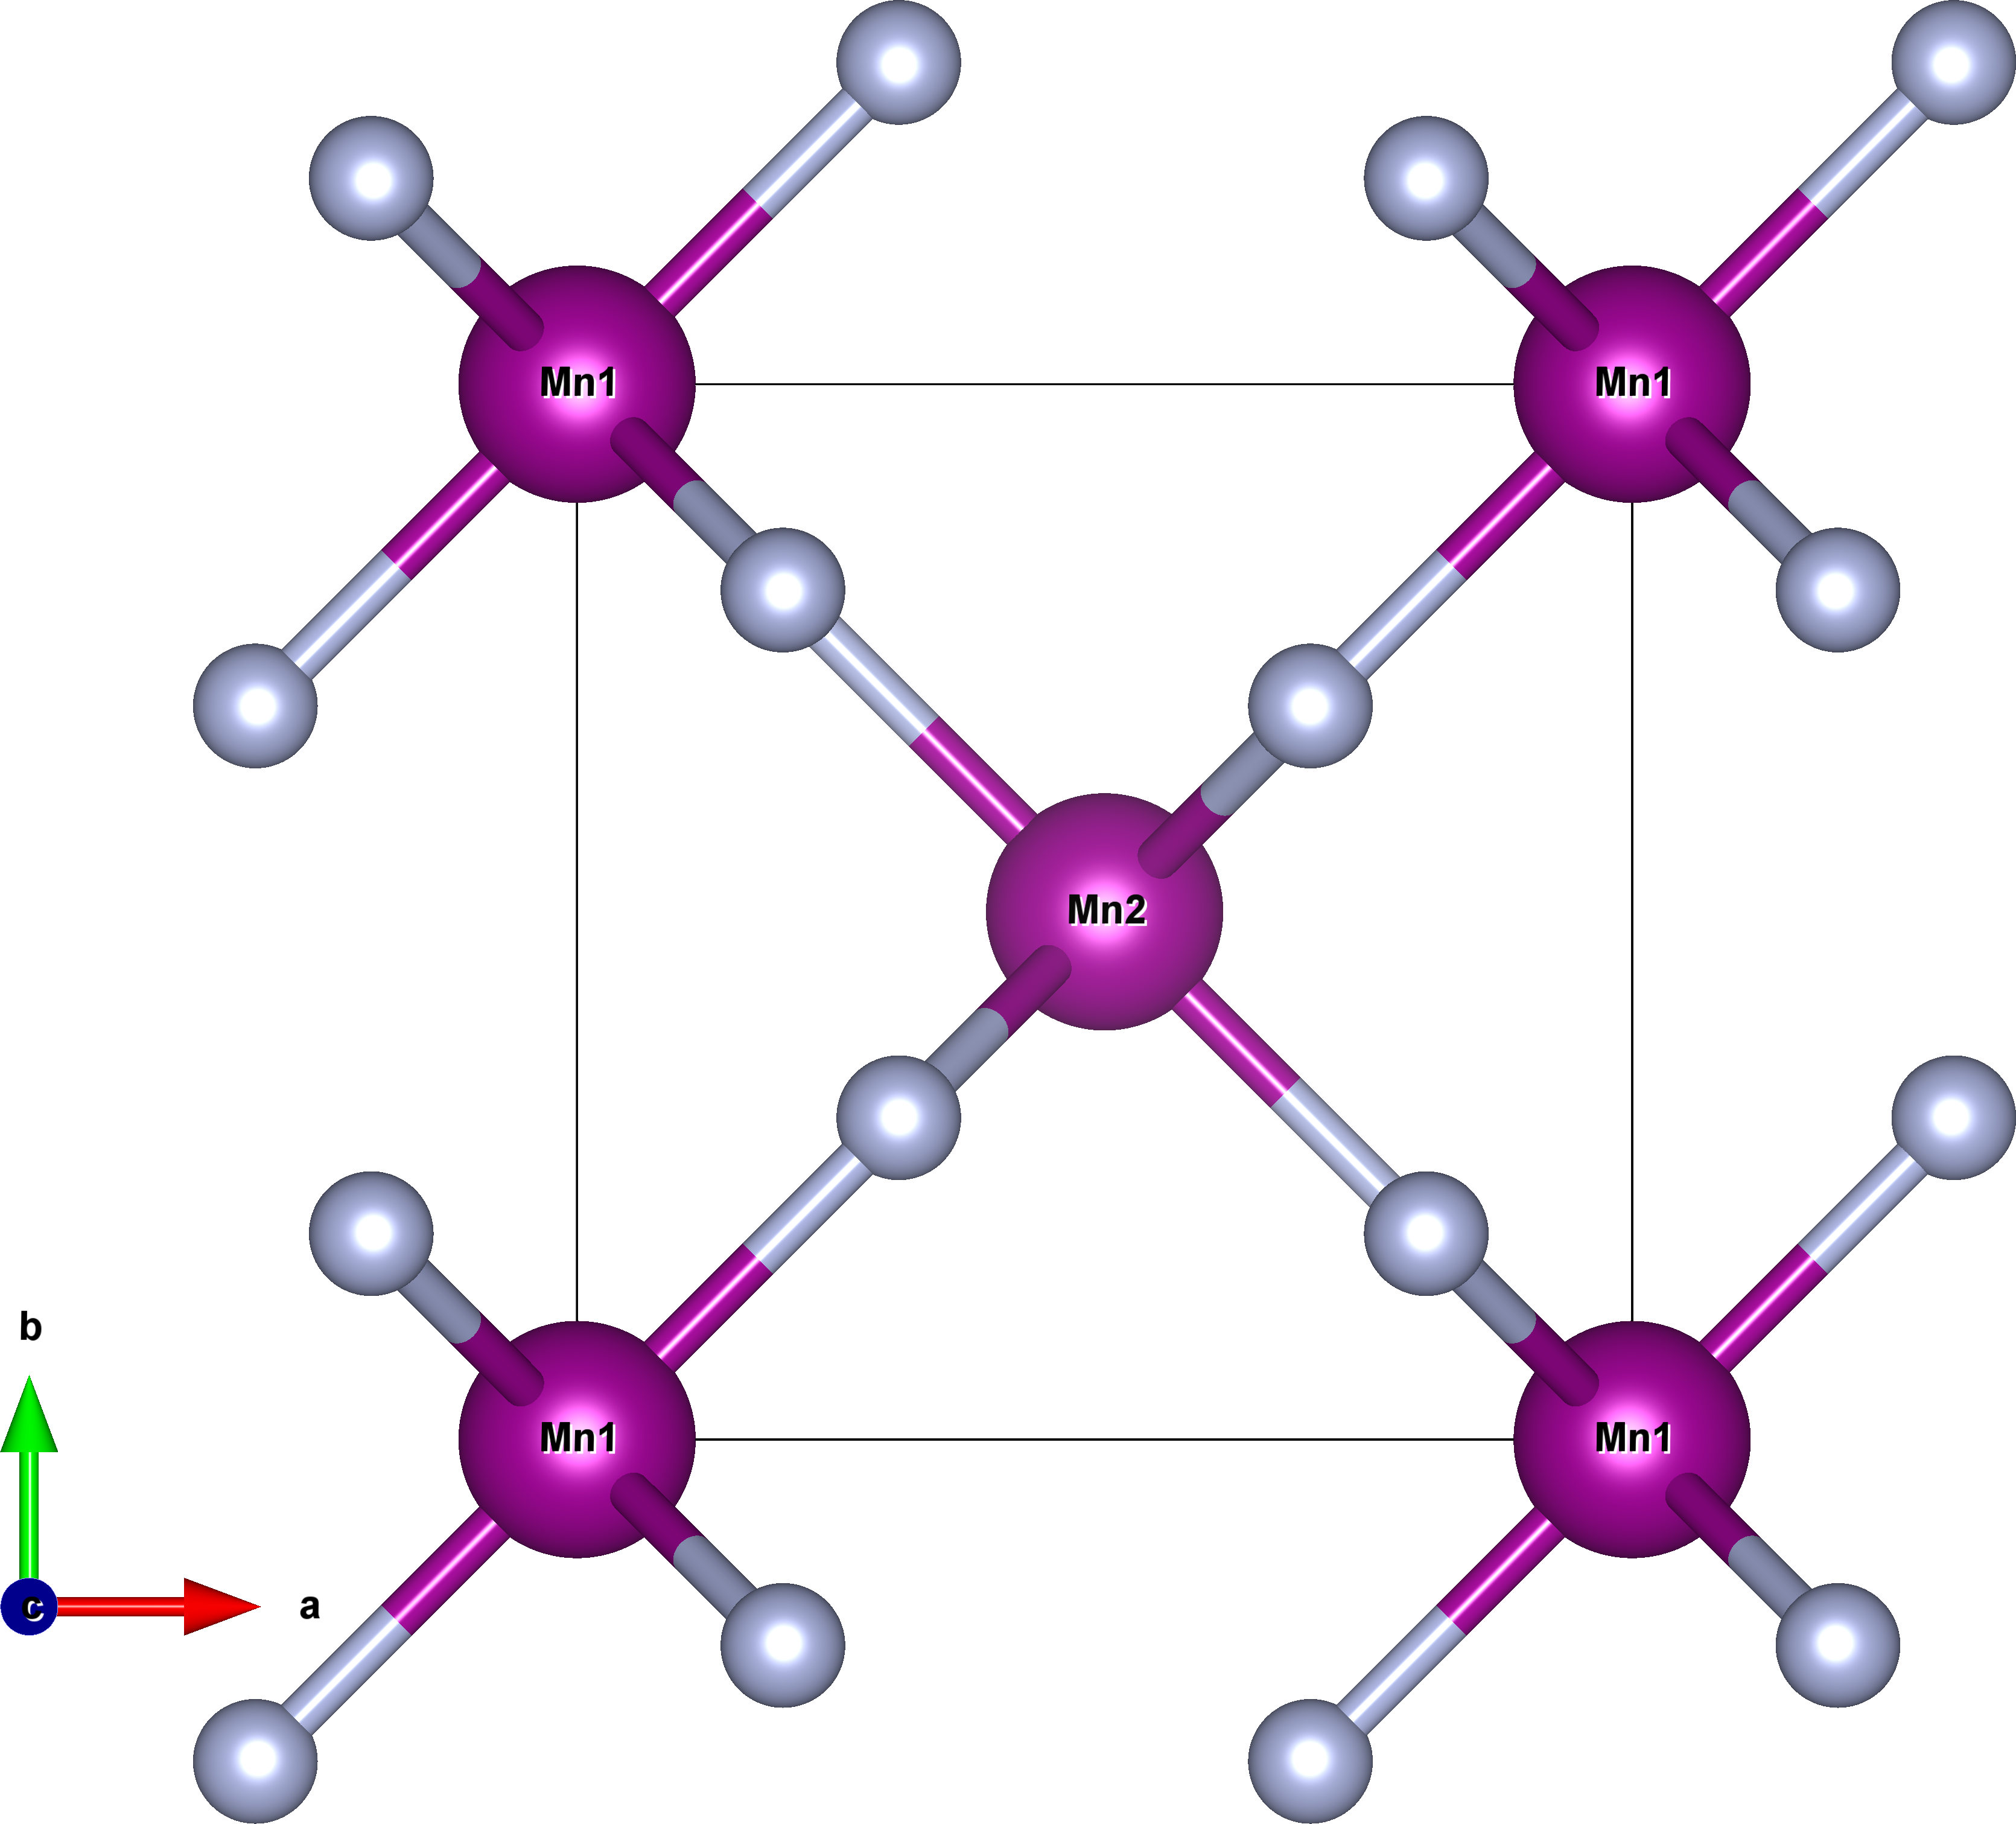

Note that the tool lists two Mn ions and their positions.
The two Mn ions are equivalent by symmetry and we will refer to them as to belonging to the same orbit.
All of the atoms in the input file will be grouped into orbits and user needs to input
the spin pattern for each orbit, i.e. assign a magnetic label for each atom.

It is assumed that space and spin coordinates are decoupled and that spin is a pseudoscalar quantity,
i.e., merely “up” or “down” and not a pseudovector; the latter is done when magnetic space group
formalism is employed.
Since the exact value of the local magnetic moment is not important for the determination if
the material is possibly an altermagnet based on the symmetry consideration, it is assumed
that atoms within the same orbit have the same value of local magnetic moment.

To proceed with the analysis, one need to specify the spin pattern for Mn ions.
One uses "u" or "U" symbols to assign spin up label and "d" or "D" for spin down.
Assuming that the spin orientations on each Mn atom are anti-parallel, type in
```
u d
```
to specify that the first Mn ions has spin up and the second has spin down.

In return, the tool will print the block for the 4 F ions:
```
Orbit of F atoms at positions:
3 (1) [0.30491 0.30491 0.     ]
4 (2) [0.69509 0.69509 0.     ]
5 (3) [0.19509 0.80491 0.5    ]
6 (4) [0.80491 0.19509 0.5    ]
Type spin (u, U, d, D, n, N, nn or NN) for each of them (space separated):
```
and will wait for the user input.

F ions are non-magnetic and the corresponding label is "n" or "N".
To label an entire orbit as non-magnetic, use "nn" or "NN" intsead of typing labels for each atom.

To proceed with the analysis, type:
```
n n n n
```

At the end of the output the answer is given:
```
Altermagnet? True
```

MnF$_2$ in this magnetic configuration is an altermagnet.

Now, run it yourself:

In [ ]:
!amcheck MnF.cif

**Question 1:** For Mn atom there was only one non-equivalent spin pattern: "u d".
The "d u" is equivalent to it by symmetry, i.e. when you flip all of the spins you get an equivalent
state; try it out using the tool.
Let's imagine that the F ion is magnetic.
How many non-equivalent net-moment-compensated spin configurations would there be for four ions?

##NiAs-structure: high-pressure FeO and MnTe

In this example we will use the NiAs structure [5] as a prototype and examine how the position
of magnetic atom affects the possibility of the compound to be an altermagnet. The prototype unit cell
contains two Ni atoms and two As atoms as depicted in the figure below:

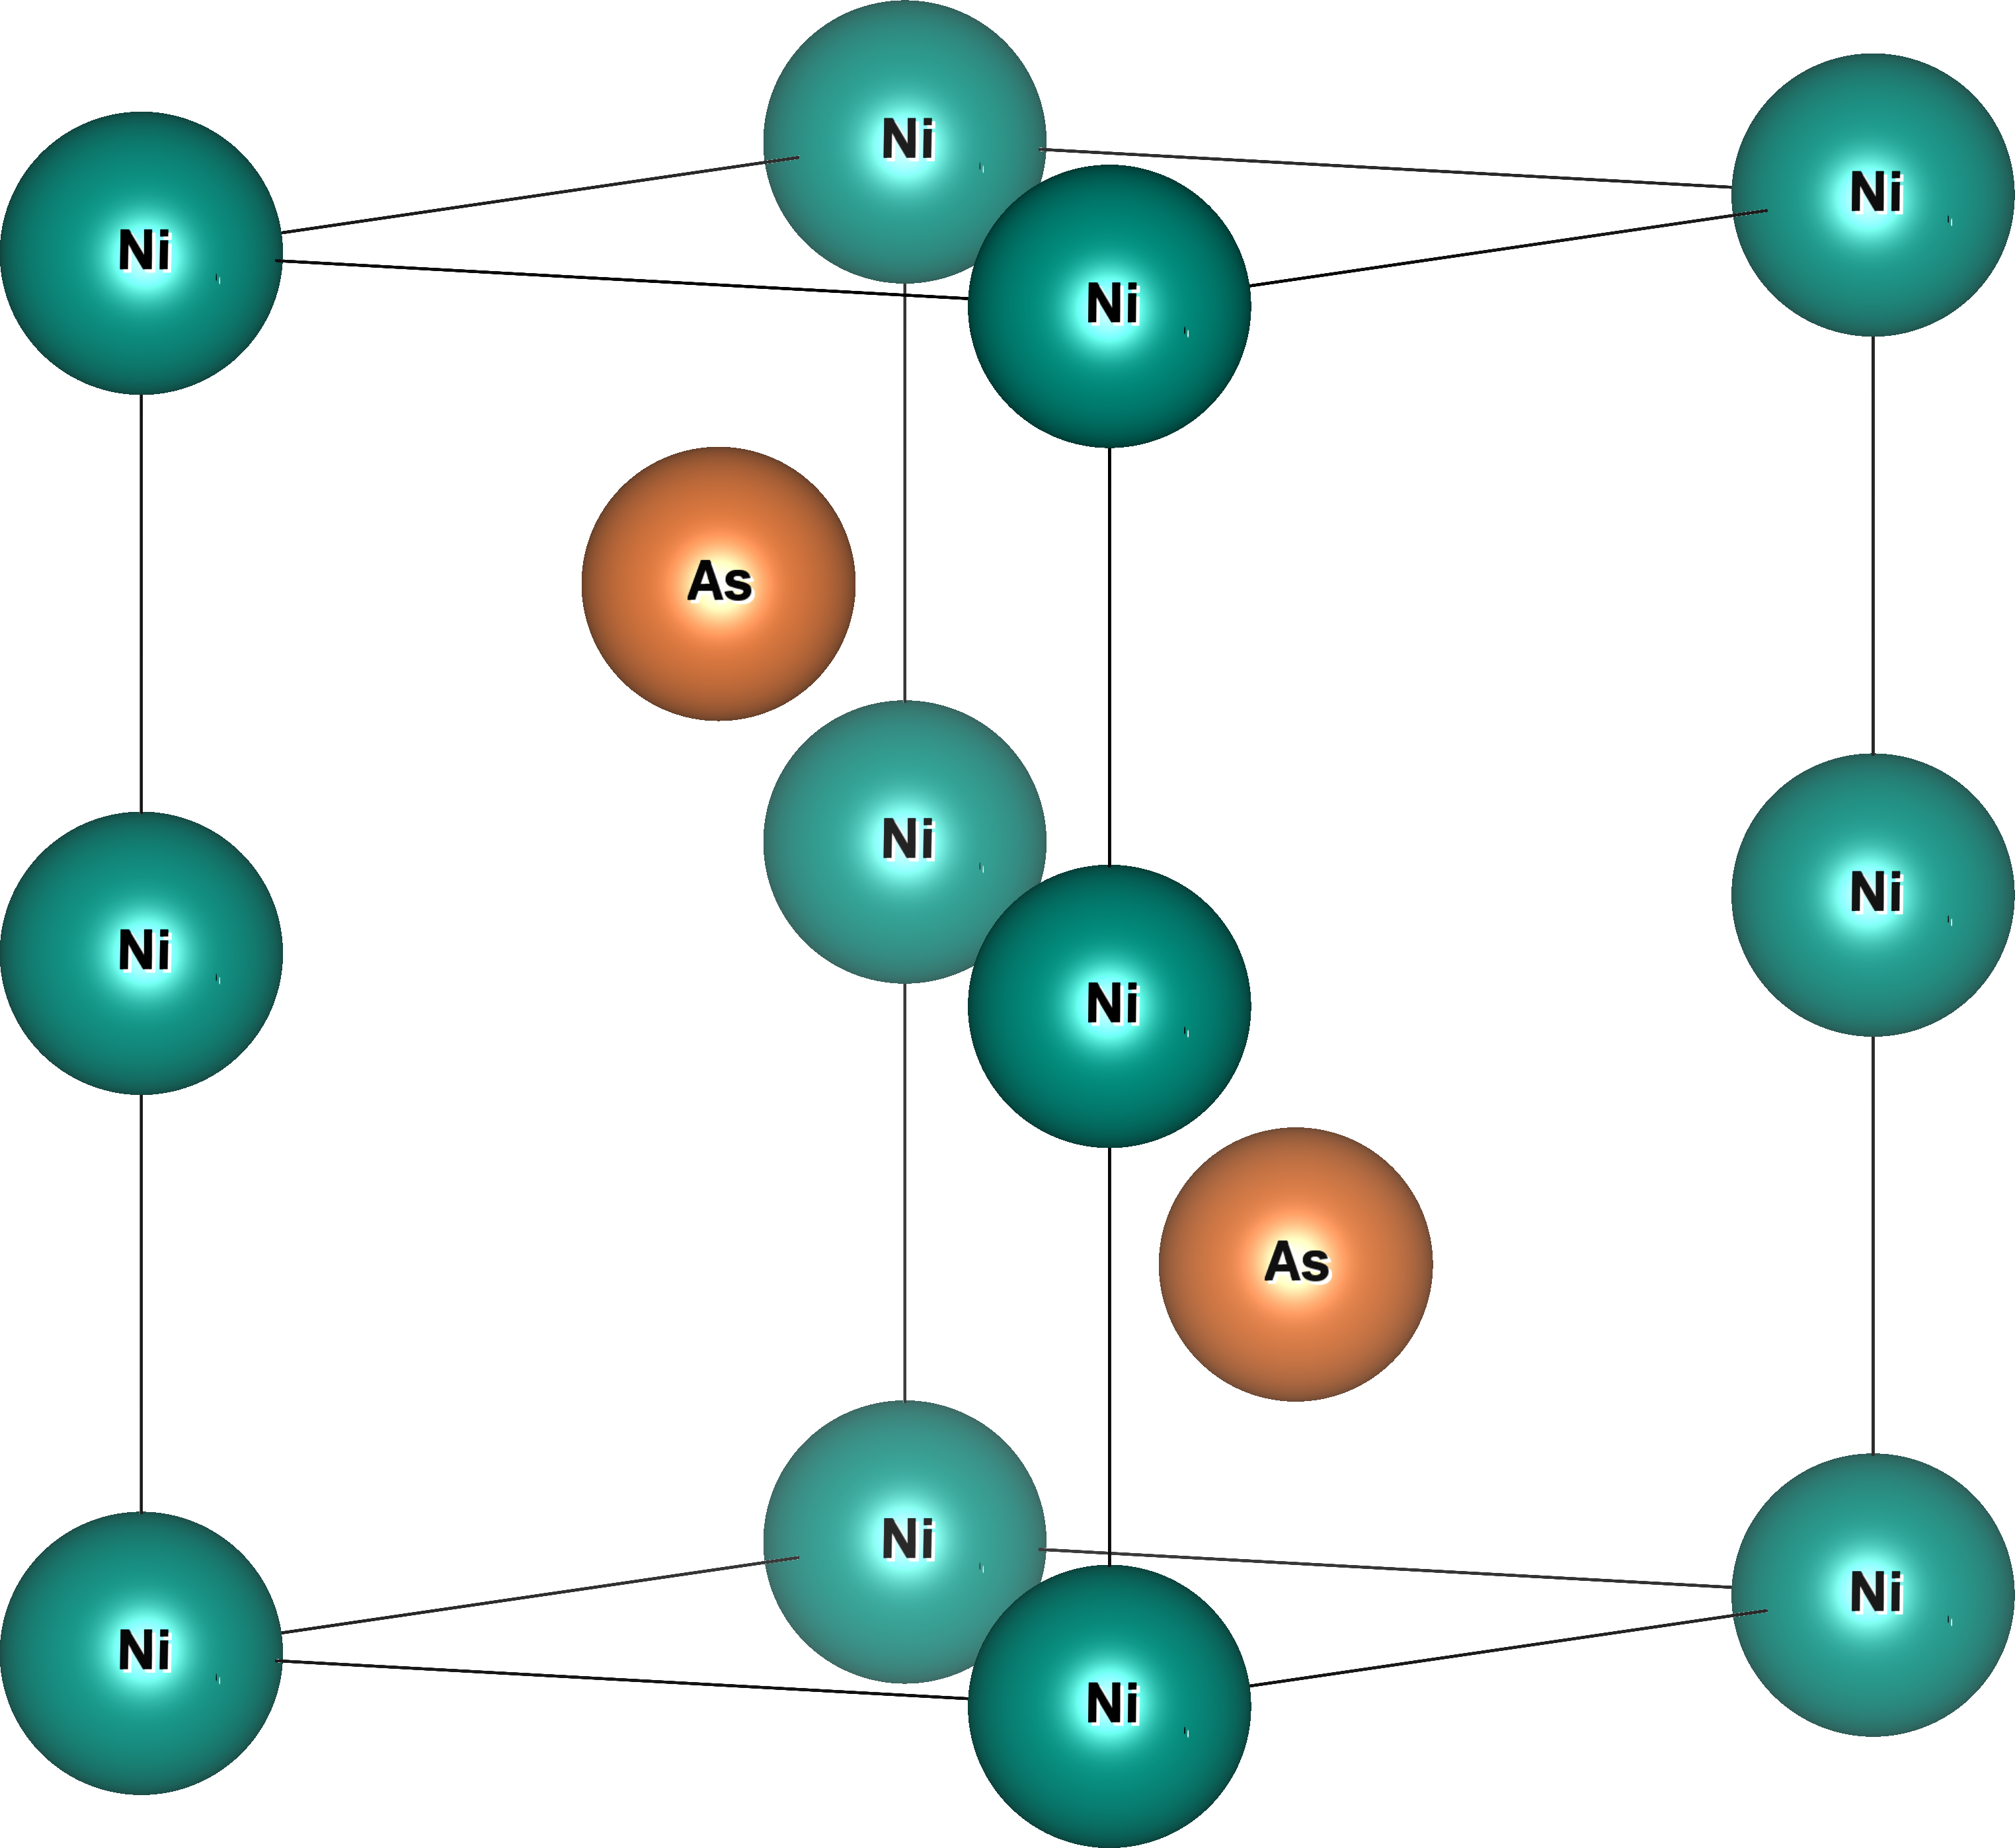

**Question 2:** This structure contains spatial inversion: taking into account all the
possible translation operations, how many inversion centers are in the unit cell?

**Question 3:** Taking into account the equivalence of atoms by translation,
examine what is the action of inversion on Ni atoms and on As atoms.
For material to be altermagnetic, what atoms, Ni or As, should be magnetic and have "u d" spin
pattern?

###FeO

In the first example we will substitute As atoms with Fe and Ni atoms with O.
This corresponds to the FeO structure at high pressure [6] and here we will create the `FeO.vasp` file that will be used later:

In [ ]:
%%shell
cat << EOF > FeO.vasp
hp-FeO. Unit cell parameters from: https://www.science.org/doi/abs/10.1126/science.266.5191.1678
1.0
        2.5739998817         0.0000000000         0.0000000000
       -1.2869999409         2.2291492869         0.0000000000
        0.0000000000         0.0000000000         5.1719999313
Fe    O
 2    2
Direct
     0.333333343         0.666666687         0.250000000
     0.666666627         0.333333313         0.750000000
     0.000000000         0.000000000         0.000000000
     0.000000000         0.000000000         0.500000000
EOF

Use the following command:
```
!amcheck FeO.vasp
```
and specify "u d" spin pattern for Fe and specify that O is non-magnetic, "n n".

The result is that FeO is an antiferromagnet, since Fe atoms are exchanged by the inversion.

In [ ]:
!amcheck FeO.vasp

###MnTe

Next, we will have a look at MnTe, where As atoms are substituted with Te and Ni atoms with Mn [7].

Again, we create the the `MnTe.vasp` file first:

In [ ]:
%%shell
cat << EOF > MnTe.vasp
MnTe. Unit cell parameters from: https://materials.springer.com/isp/crystallographic/docs/sd_0379437
1.0
        4.1260000000         0.0000000000         0.0000000000
       -2.0630000000         3.5732200000         0.0000000000
        0.0000000000         0.0000000000         6.7240000000
Mn    Te
 2    2
Direct
     0.000000000         0.000000000         0.000000000
     0.000000000         0.000000000         0.500000000
     0.333333343         0.666666687         0.250000000
     0.666666627         0.333333313         0.750000000
EOF

Use the following command:
```
!amcheck MnTe.vasp
```
and specify "u d" spin pattern for Mn and specify that Te is non-magnetic, "n n".
Confirm that MnTe is an altermagnet.

In [ ]:
!amcheck MnTe.vasp

#Answers
1.   There will be three non-equivalent spin configurations: "u u d d", "u d d u", and "u d u d".
2.   There will be 8 inversion centers in the unit cell at positions:
    (0,0,0), (0.5,0,0), (0.5,0.5,0), (0,0.5,0),
    (0,0,0.5), (0.5,0,0.5), (0.5,0.5,0.5), and (0,0.5,0.5).
3.   The spatial inversion exchanges As atoms but leaves Ni atoms unchanged, because it brings one Ni atom to the one which is equivalent to it by a translation, i.e. connected by an integer multiple of a lattice vector.
    Thus, to have an altermagnet, a magnetic atom should be at the position of Ni atom.



#References
1. A. Smolyanyuk, L. Šmejkal, and I. I. Mazin, “A tool to check whether a symmetry-compensated
collinear magnetic material is antiferro- or altermagnetic,” SciPost Phys. Codebases, p. 30, 2024.
2. W. Jauch, G. J. McIntyre, and A. J. Schultz, “Single-crystal neutron diffraction studies of MnF2 as
a function of temperature: the effect of magnetostriction,” Acta Crystallographica Section B, vol. 46,
pp. 739–742, Dec 1990.
3. I. D. Brown and B. McMahon, “CIF: the computer language of crystallography,” Acta Crystallo-
graphica Section B, vol. 58, pp. 317–324, Jun 2002
4. [The POSCAR file description page.](https://www.vasp.at/wiki/index.php/POSCAR)
5. H. Fjellvåg, A. Kjekshus, A. Andresen, and A. Zi¸eba, “Structural and magnetic properties of Mn1-
tNitAs,” Journal of Magnetism and Magnetic Materials, vol. 61, no. 1, pp. 61–80, 1986.
6. Y. Fei and H. kwang Mao, “In situ determination of the nias phase of feo at high pressure and
temperature,” Science, vol. 266, no. 5191, pp. 1678–1680, 1994.
7. G. I. Makovetskii, A. I. Galyas, G. M. Severin, and K. I. Yanushkevich, “ChemInform Abstract:
Synthesis of Solid Solutions of Cr1-xMnxTe (0 ≤ x ≤ 1).,” ChemInform, vol. 28, no. 4, 1997.